# Chapter 2 exercice
## Problem 1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [2]:
email_response_data = {'ResponseTime': ['30 minute or less', 'An hour', 'Few hours', 'Working day', 'Week or more'], 'Percentage': [.31, .22, .19, .23, .05]}

email_data = pd.DataFrame(email_response_data)
email_data.ResponseTime = email_data.ResponseTime.astype('category')
email_data.set_index('ResponseTime', inplace=True)
email_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 30 minute or less to Week or more
Data columns (total 1 columns):
Percentage    5 non-null float64
dtypes: float64(1)
memory usage: 80.0+ bytes


In [3]:
email_data

,Percentage
ResponseTime,
30 minute or less,0.31
An hour,0.22
Few hours,0.19
Working day,0.23
Week or more,0.05


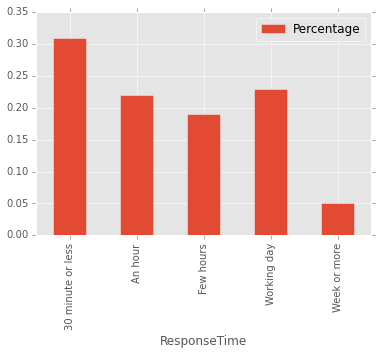

In [4]:
email_data.plot(kind='bar', use_index=True)

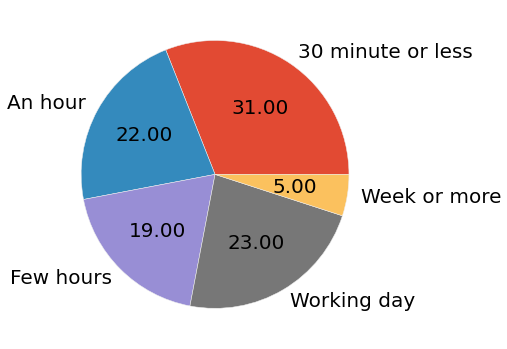

In [5]:
email_data.plot(kind='pie', y='Percentage', autopct='%.2f', fontsize=20, figsize=(6, 6), legend=False)

## Problem 2

In [6]:
medication_errors_data = {'Reason': ['Additional Instructions', 'Dose', 'Drug', 'Duplicate order entry', 'Frequency', 'Omission', 'Order not discontinued when received', 'Order not received', 'Patient', 'Route', 'Other'],
                                     'Frequency': [16, 23, 14, 22, 47, 21, 12, 52, 5, 4, 8]}
medication_errors = pd.DataFrame(medication_errors_data)
medication_errors.Reason = medication_errors.Reason.astype('category')
medication_errors.set_index('Reason', inplace=True)
medication_errors

,Frequency
Reason,
Additional Instructions,16
Dose,23
Drug,14
Duplicate order entry,22
Frequency,47
Omission,21
Order not discontinued when received,12
Order not received,52
Patient,5


### 1st solution

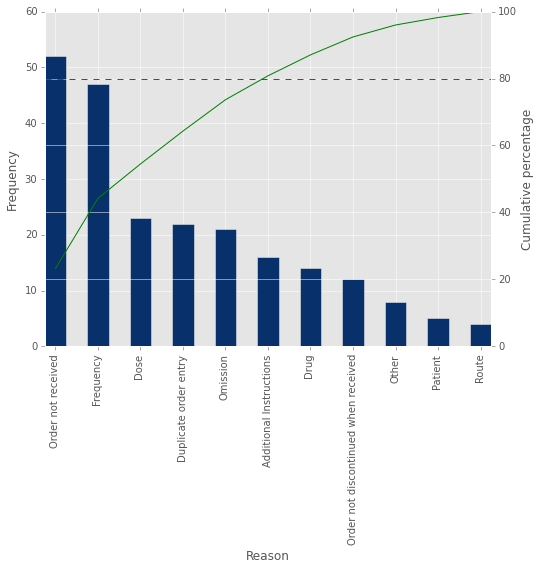

In [7]:
medication_errors.sort(columns='Frequency', ascending=False, inplace=True)
medication_errors['Percent'] = medication_errors.Frequency / medication_errors.Frequency.sum()
ax1 = medication_errors.plot(kind='bar', y='Frequency', colormap='Blues_r', legend=False, figsize=(8,6))
ax2 = ax1.twinx()
ax2.plot(medication_errors.Percent.cumsum()*100.00, linestyle='-', color='g', linewidth=1) 
ax2.axhline(80.00, color='r', linestyle='--')
ax2.axhline(0.00, color='b', linestyle='-')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative percentage')

### 2nd solution

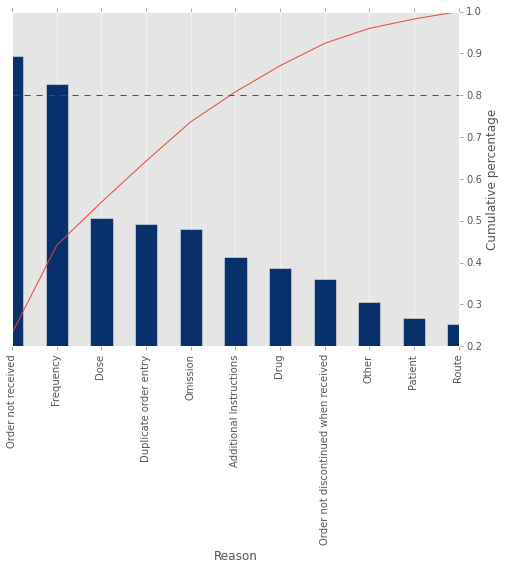

In [8]:
medication_errors.sort(columns='Frequency', ascending=False, inplace=True)
medication_errors['Percent'] = medication_errors.Frequency.cumsum() / medication_errors.Frequency.sum()
ax = medication_errors.Frequency.plot(kind='bar', colormap='Blues_r', legend=False, rot=90, position=0.5, figsize=(8, 6))
medication_errors.Percent.plot(kind='line', secondary_y=True, legend=False, rot=90)
ax.set_ylabel('Frequency')
ax.right_ax.set_ylabel('Cumulative percentage')
ax.right_ax.axhline(.8, color='g', linestyle='--')

In [9]:
### Different cumulative percent calculations

In [10]:
medication_errors['Percent'] = medication_errors.Frequency / medication_errors.Frequency.sum()
medication_errors['PercentCum'] = medication_errors.Percent.cumsum()
medication_errors['CumPercent'] = medication_errors.Frequency.cumsum() / medication_errors.Frequency.sum()
medication_errors['CumPercentCUM'] = medication_errors.Frequency.cumsum() / medication_errors.Frequency.cumsum()
medication_errors

,Frequency,Percent,PercentCum,CumPercent,CumPercentCUM
Reason,,,,,
Order not received,52,0.232143,0.232143,0.232143,1
Frequency,47,0.209821,0.441964,0.441964,1
Dose,23,0.102679,0.544643,0.544643,1
Duplicate order entry,22,0.098214,0.642857,0.642857,1
Omission,21,0.093750,0.736607,0.736607,1
Additional Instructions,16,0.071429,0.808036,0.808036,1
Drug,14,0.062500,0.870536,0.870536,1
Order not discontinued when received,12,0.053571,0.924107,0.924107,1
Other,8,0.035714,0.959821,0.959821,1


## Problem 3

In [11]:
domestic_beer = pd.read_excel('C:\\Users\\Alexandre\\OneDrive\\Formação\\Even You Can Learn Statistics and Analytics (An Easy to Understand Guide to Statistics and Analytics)\\ExcelDataFiles\\DomesticBeer.xlsx')
domestic_beer.columns = ['Brand', 'AlcoholPercent', 'Calories', 'Carbohydrates']
domestic_beer.Brand = domestic_beer.Brand.astype('category')
domestic_beer.set_index('Brand', inplace=True)

In [12]:
# domestic_beer['Alcohol_bin'] = pd.cut(domestic_beer.AlcoholPercent, bins=10)
# alcohol_dist = domestic_beer.groupby('Alcohol_bin')['AlcoholPercent'].count()
alcohol_dist = pd.DataFrame(pd.DataFrame(pd.cut(domestic_beer.AlcoholPercent, bins=13)).groupby('AlcoholPercent')['AlcoholPercent'].count())
alcohol_dist['Percent'] = (alcohol_dist / alcohol_dist.sum())*100
print(alcohol_dist)
calories_dist = pd.DataFrame(pd.DataFrame(pd.cut(domestic_beer.Calories, bins=13)).groupby('Calories')['Calories'].count())
calories_dist ['Percent'] = (calories_dist / calories_dist.sum())*100
print(calories_dist)
carbohydrates_dist = pd.DataFrame(pd.DataFrame(pd.cut(domestic_beer.Carbohydrates, bins=10)).groupby('Carbohydrates')['Carbohydrates'].count())
carbohydrates_dist['Percent'] = (carbohydrates_dist / carbohydrates_dist.sum())*100
print(carbohydrates_dist)

                 AlcoholPercent    Percent
AlcoholPercent                            
(0.389, 1.254]                1   0.657895
(1.254, 2.108]                0   0.000000
(2.108, 2.962]                2   1.315789
(2.962, 3.815]                3   1.973684
(3.815, 4.669]               43  28.289474
(4.669, 5.523]               60  39.473684
(5.523, 6.377]               21  13.815789
(6.377, 7.231]                8   5.263158
(7.231, 8.0846]               5   3.289474
(8.0846, 8.938]               4   2.631579
(8.938, 9.792]                2   1.315789
(9.792, 10.646]               2   1.315789
(10.646, 11.5]                1   0.657895
                     Calories    Percent
Calories                                
(54.725, 76.154]            3   1.973684
(76.154, 97.308]            6   3.947368
(97.308, 118.462]          23  15.131579
(118.462, 139.615]         18  11.842105
(139.615, 160.769]         53  34.868421
(160.769, 181.923]         21  13.815789
(181.923, 203.0769]        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008BE6B70>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008C96668>]], dtype=object)

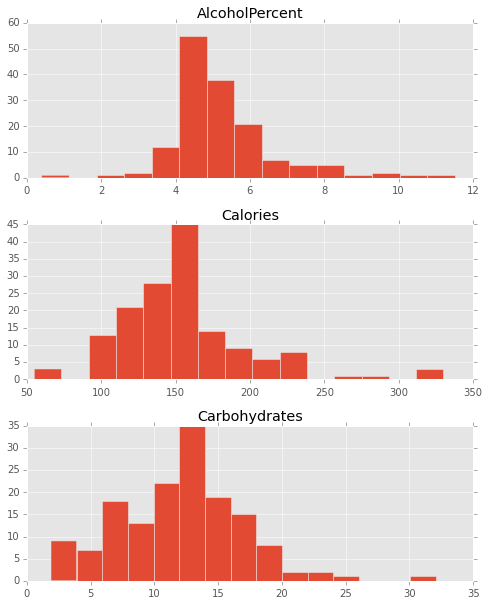

In [13]:
domestic_beer.hist(column=['AlcoholPercent', 'Calories', 'Carbohydrates'], bins=15, layout=(3, 1), figsize=(8, 10))

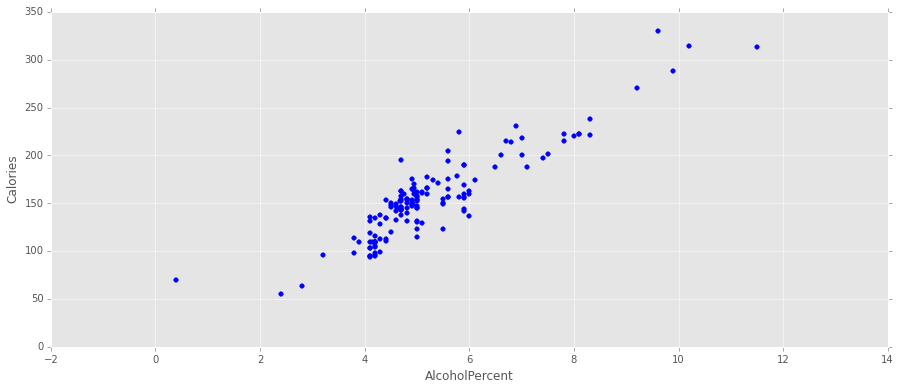

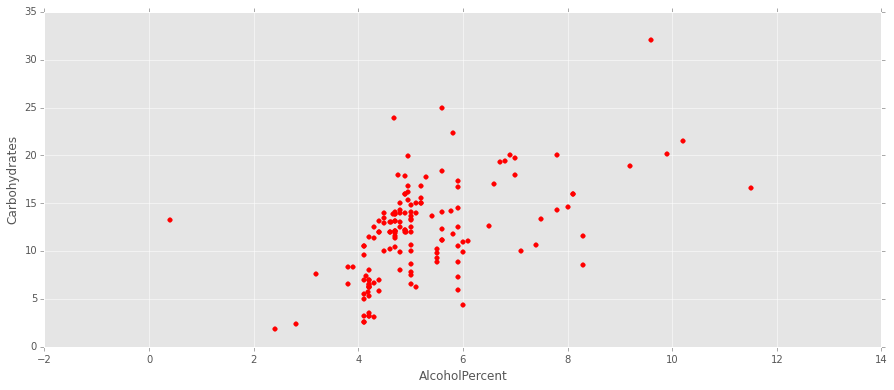

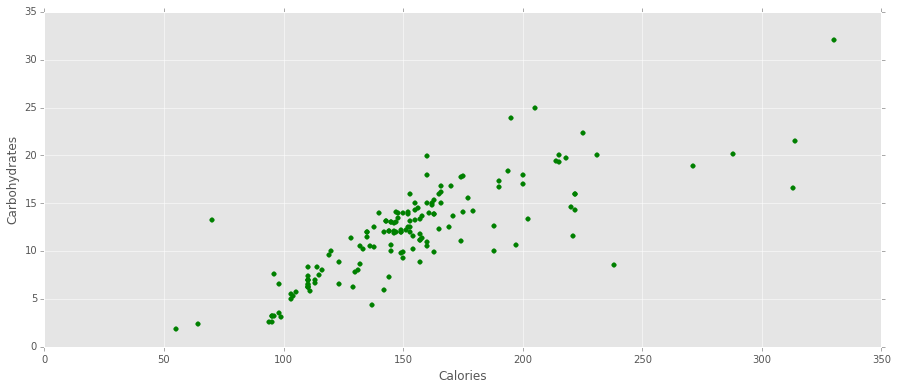

In [14]:
ax = domestic_beer.plot(kind='scatter', x='AlcoholPercent', y='Calories', color='Blue', figsize=(15, 6))
domestic_beer.plot(kind='scatter', x='AlcoholPercent', y='Carbohydrates', color='Red', figsize=(15, 6))
domestic_beer.plot(kind='scatter', x='Calories', y='Carbohydrates', color='Green', figsize=(15, 6))

## Problem 4

In [15]:
property_taxes = pd.read_excel('C:\\Users\\Alexandre\\OneDrive\\Formação\\Even You Can Learn Statistics and Analytics (An Easy to Understand Guide to Statistics and Analytics)\\ExcelDataFiles\\PropertyTaxes.xlsx')
property_taxes.columns = ['State', 'PropertyTaxes']
property_taxes.State = property_taxes.State.astype('category')
property_taxes.set_index('State', inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008EA25F8>]], dtype=object)

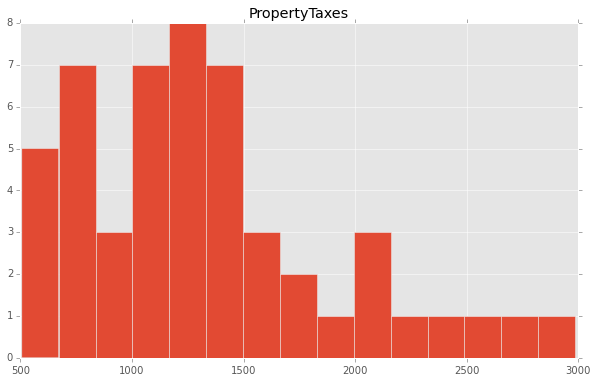

In [16]:
property_taxes.hist(bins=15, figsize=(10, 6))